## KMeans

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [2]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans.fit(features)

# The lowest SSE value
kmeans.inertia_


# Final locations of the centroid
kmeans.cluster_centers_

array([[ 4.69396233,  2.15039643],
       [-2.75094934,  8.97602228],
       [-6.47709913, -6.71236134]])

In [3]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    sse.append(kmeans.inertia_)

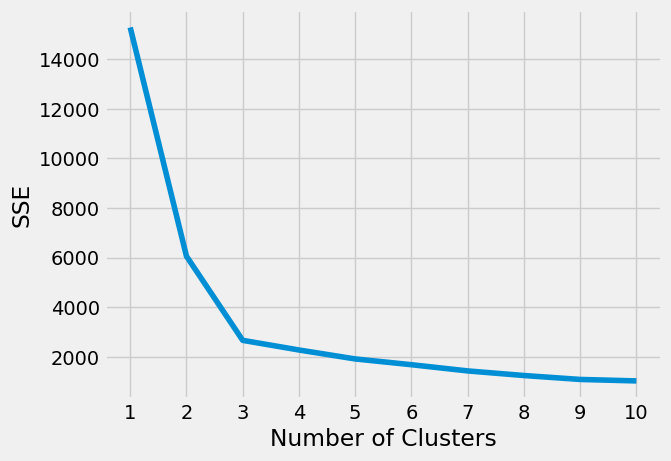

In [4]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [5]:
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(features)
    score = silhouette_score(features, kmeans.labels_)
    silhouette_coefficients.append(score)

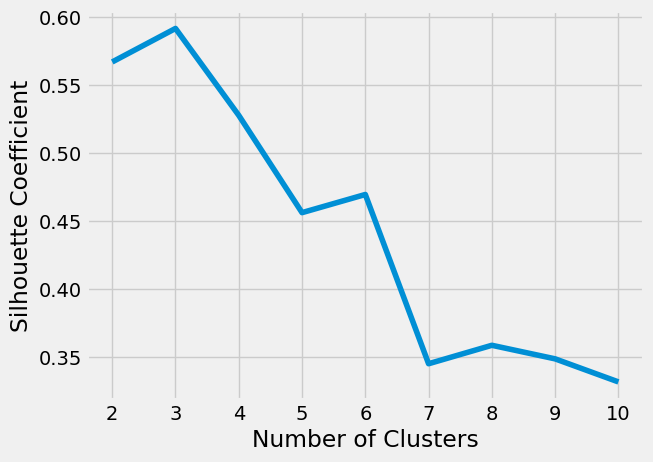

In [6]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## 案例：KMeans像素聚类

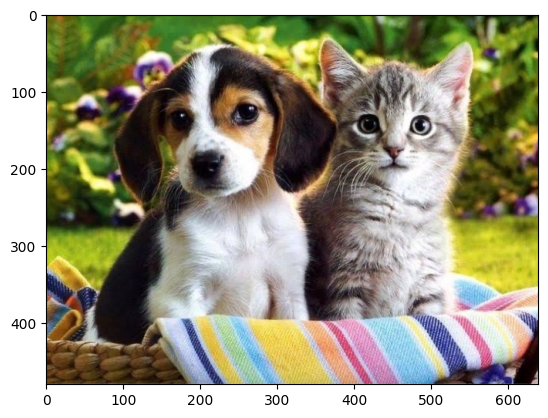

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
  
image = cv2.imread('dog-cat.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
plt.style.use("default")
_ = plt.xticks(); _ = plt.yticks()
plt.imshow(image)

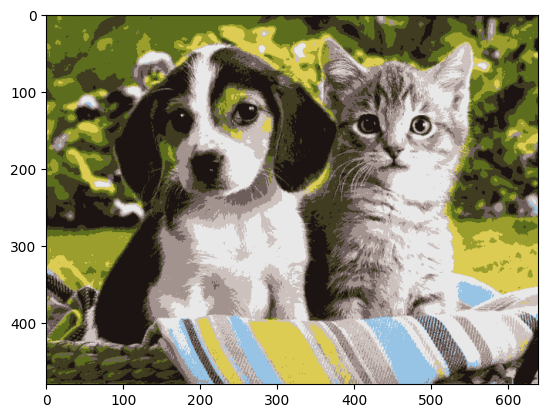

In [8]:
pixel_vals = image.reshape((-1,3))
pixel_vals = np.float32(pixel_vals)

kmeans = KMeans(
    init="random",
    n_clusters=10,
)
kmeans.fit(pixel_vals)

segmented_data = kmeans.cluster_centers_[kmeans.predict(pixel_vals)]
segmented_data = np.uint8(segmented_data)

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
 
plt.imshow(segmented_image)

## 案例：用户人群划分

本数据集包含了淘宝APP 2017年11月25日至2017年12月3日之间，有行为的约一百万随机用户的所有行为（行为包括点击、购买、加购、喜欢）。数据集的组织形式和MovieLens-20M类似，即数据集的每一行表示一条用户行为，由用户ID、商品ID、商品类目ID、行为类型和时间戳组成，并以逗号分隔。

| 列名称     | 说明                                               |
| ---------- | -------------------------------------------------- |
| 用户ID     | 整数类型，序列化后的用户ID                         |
| 商品ID     | 整数类型，序列化后的商品ID                         |
| 商品类目ID | 整数类型，序列化后的商品所属类目ID                 |
| 行为类型   | 字符串，枚举类型，包括('pv', 'buy', 'cart', 'fav') |
| 时间戳     | 行为发生的时间戳                                   |

https://tianchi.aliyun.com/dataset/dataDetail?dataId=649&userId=1

In [9]:
import pandas as pd
UserBehavior = pd.read_csv('UserBehavior-15k.csv.zip')
UserBehavior.columns = ['user', 'item', 'category', 'action', 'ts']

In [10]:
user_action_count1 = pd.pivot_table(UserBehavior[['user', 'action', 'item']], 
               index=['user'], columns=['action'], aggfunc='count')

In [11]:
user_action_count2 = UserBehavior.groupby('user').agg({
    'item': ['count', 'nunique'],
    # 'category': ['count', 'nunique'],
    'action': ['nunique'],
    'ts': ['nunique', np.ptp]
})

In [12]:
user_action_count1 = user_action_count1.reset_index()
user_action_count1.columns = [x[0]+x[1] for x in user_action_count1.columns]
user_action_count1 = user_action_count1.fillna(0)

In [13]:
user_action_count2 = user_action_count2.reset_index()
user_action_count2.columns = [x[0]+x[1] for x in user_action_count2.columns]
user_action_count2 = user_action_count2.fillna(0)

In [14]:
user_action_count = pd.merge(user_action_count1, user_action_count2, on='user')

In [15]:
for col in user_action_count.columns[1:]:
    user_action_count[col] /= user_action_count[col].max()

In [16]:
user_action_count.head(10)

,user,itembuy,itemcart,itemfav,itempv,itemcount,itemnunique,actionnunique,tsnunique,tsptp
0,1,0.000000,0.000000,0.000000,0.072848,0.070423,0.075908,0.25,0.070513,0.030853
1,13,0.000000,0.035398,0.000000,0.009272,0.014085,0.016502,0.50,0.014103,0.026463
2,100,0.111111,0.000000,0.035503,0.111258,0.125480,0.095710,0.75,0.125641,0.031509
3,115,0.000000,0.026549,0.065089,0.300662,0.308579,0.336634,0.75,0.308974,0.029558
4,117,0.138889,0.035398,0.000000,0.206623,0.217670,0.103960,0.75,0.212821,0.029756
5,118,0.000000,0.000000,0.000000,0.119205,0.115237,0.122112,0.25,0.115385,0.030722
6,119,0.041667,0.008850,0.035503,0.186755,0.193342,0.209571,1.00,0.193590,0.031695
7,121,0.013889,0.115044,0.041420,0.131126,0.153649,0.141914,1.00,0.153846,0.031923
8,122,0.041667,0.088496,0.153846,0.321854,0.361076,0.412541,1.00,0.361538,0.031277
9,134,0.000000,0.159292,0.000000,0.054305,0.075544,0.090759,0.50,0.075641,0.028064


In [17]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
)

kmeans.fit(user_action_count.iloc[:, 1:])

KMeans(init='random', n_clusters=3)

In [18]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 500,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(user_action_count.iloc[:, 1:])
    sse.append(kmeans.inertia_)

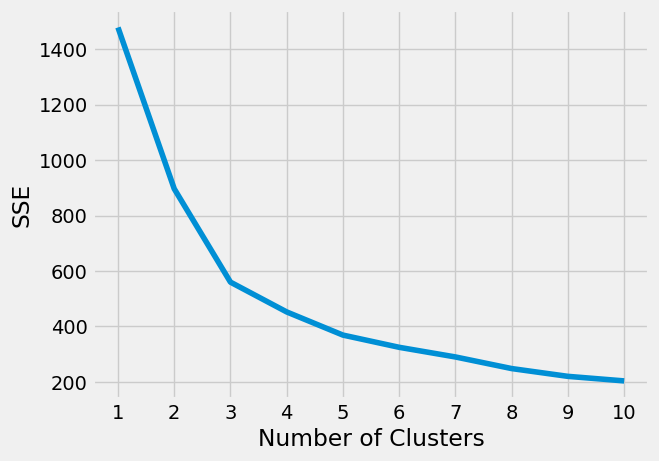

In [19]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()